#### 1 prediction results evaluation

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# Batch size for FC: 128
all_pred = np.load('mippi_FC/all_pred.npy',allow_pickle=True)
all_true = np.load('mippi_FC/all_true.npy',allow_pickle=True)
print(all_pred)
print(all_true.shape)
pred_list = []
true_list = []
for i in range(5):
    for j in range(all_pred[i].shape[0]):
        pred_list.append(all_pred[i][j])
for i in range(5):
    for j in range(all_true[i].shape[0]):
        true_list.append(all_true[i][j])
pred = np.array(pred_list)
true = np.array(true_list)

[array([[2.5165874e-01, 6.7406795e-06, 7.4833196e-01, 2.6285995e-06],
        [3.1333834e-01, 6.7346595e-04, 6.8509978e-01, 8.8842795e-04],
        [7.3121083e-01, 1.4660473e-04, 2.6859921e-01, 4.3327142e-05],
        ...,
        [6.8014264e-02, 4.2631677e-01, 1.0276180e-01, 4.0290713e-01],
        [4.3158218e-02, 7.3656148e-01, 1.1203369e-03, 2.1915993e-01],
        [3.6748856e-01, 1.3085653e-04, 6.3231158e-01, 6.8962858e-05]],
       dtype=float32)
 array([[7.2582144e-01, 2.1337396e-01, 4.6461276e-03, 5.6158490e-02],
        [3.7654486e-02, 5.6841132e-10, 9.6234554e-01, 2.3246850e-10],
        [5.2706577e-02, 3.2678902e-02, 8.8952154e-01, 2.5093039e-02],
        ...,
        [3.0688231e-03, 4.4131240e-01, 1.9750465e-02, 5.3586829e-01],
        [7.7509689e-01, 5.5766670e-04, 2.2400858e-01, 3.3690609e-04],
        [1.0030135e-02, 8.9872547e-06, 9.8995727e-01, 3.5900935e-06]],
       dtype=float32)
 array([[9.65806842e-01, 1.07047893e-02, 1.70507859e-02, 6.43767975e-03],
        [5.975

In [3]:
# label order: disrupting, decreasing, no effect, increasing
from sklearn.metrics import matthews_corrcoef,precision_score, recall_score, f1_score

pred_arg = np.argmax(pred, axis=-1)
true_arg = np.argmax(true, axis=-1)
sum = pred.shape[0]
true_num = 0
for i in range(pred.shape[0]):
    if(pred_arg[i] == true_arg[i]):
        true_num += 1
print('acc: ', float(true_num)/sum)

disrupting_pred_list = []
disrupting_true_list = []
decreasing_pred_list = []
decreasing_true_list = []
noeffect_pred_list = []
noeffect_true_list = []
increasing_pred_list = []
increasing_true_list = []

for i in range(pred.shape[0]):
    if(pred_arg[i] == 0):
        disrupting_pred_list.append(1)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 1):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(1)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 2):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(1)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 3):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(1)

for i in range(true.shape[0]):
    if(true_arg[i] == 0):
        disrupting_true_list.append(1)
        decreasing_true_list.append(0)
        noeffect_true_list.append(0)
        increasing_true_list.append(0)
    if(true_arg[i] == 1):
        disrupting_true_list.append(0)
        decreasing_true_list.append(1)
        noeffect_true_list.append(0)
        increasing_true_list.append(0)
    if(true_arg[i] == 2):
        disrupting_true_list.append(0)
        decreasing_true_list.append(0)
        noeffect_true_list.append(1)
        increasing_true_list.append(0)
    if(true_arg[i] == 3):
        disrupting_true_list.append(0)
        decreasing_true_list.append(0)
        noeffect_true_list.append(0)
        increasing_true_list.append(1)

disrupting_pred = np.array(disrupting_pred_list)
disrupting_true = np.array(disrupting_true_list)
decreasing_pred = np.array(decreasing_pred_list)
decreasing_true = np.array(decreasing_true_list)
noeffect_pred = np.array(noeffect_pred_list)
noeffect_true = np.array(noeffect_true_list)
increasing_pred = np.array(increasing_pred_list)
increasing_true = np.array(increasing_true_list)

print('disrupting: ',precision_score(disrupting_pred,disrupting_true), recall_score(disrupting_pred,disrupting_true), f1_score(disrupting_pred,disrupting_true),matthews_corrcoef(disrupting_pred,disrupting_true))
print('decreasing: ',precision_score(decreasing_pred,decreasing_true), recall_score(decreasing_pred,decreasing_true), f1_score(decreasing_pred,decreasing_true),matthews_corrcoef(decreasing_pred,decreasing_true))
print('noeffect: ',precision_score(noeffect_pred,noeffect_true), recall_score(noeffect_pred,noeffect_true), f1_score(noeffect_pred,noeffect_true),matthews_corrcoef(noeffect_pred,noeffect_true))
print('increasing: ',precision_score(increasing_pred,increasing_true), recall_score(increasing_pred,increasing_true), f1_score(increasing_pred,increasing_true),matthews_corrcoef(increasing_pred,increasing_true))

acc:  0.6419888159494287
disrupting:  0.6173881144534116 0.6196612665684831 0.6185226019845644 0.4299693159392554
decreasing:  0.4933673469387755 0.5825301204819278 0.5342541436464088 0.4063096889662416
noeffect:  0.805 0.7412523020257827 0.7718120805369129 0.6335144730640299
increasing:  0.4 0.36486486486486486 0.3816254416961131 0.33644655585213135


In [4]:
# Batch size for CNN: 128
all_pred = np.load('mippi_CNN/all_pred.npy',allow_pickle=True)
all_true = np.load('mippi_CNN/all_true.npy',allow_pickle=True)
print(all_pred)
print(all_true.shape)
pred_list = []
true_list = []
for i in range(5):
    for j in range(all_pred[i].shape[0]):
        pred_list.append(all_pred[i][j])
for i in range(5):
    for j in range(all_true[i].shape[0]):
        true_list.append(all_true[i][j])
pred = np.array(pred_list)
true = np.array(true_list)

[array([[5.4360437e-01, 4.7207656e-08, 4.5639551e-01, 1.8235301e-08],
        [4.8131105e-02, 3.1580526e-04, 9.5100516e-01, 5.4793613e-04],
        [7.5230563e-01, 5.0413564e-05, 2.4763803e-01, 5.8935630e-06],
        ...,
        [2.3535579e-03, 4.6178162e-01, 2.6308093e-02, 5.0955671e-01],
        [6.4937913e-01, 2.5496560e-01, 6.6395395e-02, 2.9259820e-02],
        [3.7377757e-01, 4.2132121e-03, 6.1919492e-01, 2.8142631e-03]],
       dtype=float32)
 array([[2.11327240e-01, 6.05918527e-01, 2.88927509e-03, 1.79864958e-01],
        [3.83273363e-01, 1.35855153e-02, 5.91456711e-01, 1.16843637e-02],
        [1.25022411e-01, 4.53655630e-01, 1.04373656e-01, 3.16948324e-01],
        ...,
        [5.43264635e-02, 4.07263964e-01, 7.73288980e-02, 4.61080641e-01],
        [9.47525799e-01, 7.50415958e-03, 3.95765007e-02, 5.39347390e-03],
        [2.49905437e-01, 9.47740744e-04, 7.48486340e-01, 6.60485472e-04]],
       dtype=float32)
 array([[0.5190825 , 0.18713993, 0.10443795, 0.18933961],
      

In [5]:
# label order: disrupting, decreasing, no effect, increasing
from sklearn.metrics import matthews_corrcoef,precision_score, recall_score, f1_score

pred_arg = np.argmax(pred, axis=-1)
true_arg = np.argmax(true, axis=-1)
sum = pred.shape[0]
true_num = 0
for i in range(pred.shape[0]):
    if(pred_arg[i] == true_arg[i]):
        true_num += 1
print('acc: ', float(true_num)/sum)

disrupting_pred_list = []
disrupting_true_list = []
decreasing_pred_list = []
decreasing_true_list = []
noeffect_pred_list = []
noeffect_true_list = []
increasing_pred_list = []
increasing_true_list = []

for i in range(pred.shape[0]):
    if(pred_arg[i] == 0):
        disrupting_pred_list.append(1)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 1):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(1)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 2):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(1)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 3):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(1)

for i in range(true.shape[0]):
    if(true_arg[i] == 0):
        disrupting_true_list.append(1)
        decreasing_true_list.append(0)
        noeffect_true_list.append(0)
        increasing_true_list.append(0)
    if(true_arg[i] == 1):
        disrupting_true_list.append(0)
        decreasing_true_list.append(1)
        noeffect_true_list.append(0)
        increasing_true_list.append(0)
    if(true_arg[i] == 2):
        disrupting_true_list.append(0)
        decreasing_true_list.append(0)
        noeffect_true_list.append(1)
        increasing_true_list.append(0)
    if(true_arg[i] == 3):
        disrupting_true_list.append(0)
        decreasing_true_list.append(0)
        noeffect_true_list.append(0)
        increasing_true_list.append(1)

disrupting_pred = np.array(disrupting_pred_list)
disrupting_true = np.array(disrupting_true_list)
decreasing_pred = np.array(decreasing_pred_list)
decreasing_true = np.array(decreasing_true_list)
noeffect_pred = np.array(noeffect_pred_list)
noeffect_true = np.array(noeffect_true_list)
increasing_pred = np.array(increasing_pred_list)
increasing_true = np.array(increasing_true_list)

print('disrupting: ',precision_score(disrupting_pred,disrupting_true), recall_score(disrupting_pred,disrupting_true), f1_score(disrupting_pred,disrupting_true),matthews_corrcoef(disrupting_pred,disrupting_true))
print('decreasing: ',precision_score(decreasing_pred,decreasing_true), recall_score(decreasing_pred,decreasing_true), f1_score(decreasing_pred,decreasing_true),matthews_corrcoef(decreasing_pred,decreasing_true))
print('noeffect: ',precision_score(noeffect_pred,noeffect_true), recall_score(noeffect_pred,noeffect_true), f1_score(noeffect_pred,noeffect_true),matthews_corrcoef(noeffect_pred,noeffect_true))
print('increasing: ',precision_score(increasing_pred,increasing_true), recall_score(increasing_pred,increasing_true), f1_score(increasing_pred,increasing_true),matthews_corrcoef(increasing_pred,increasing_true))

acc:  0.6388281060053489
disrupting:  0.623624358033749 0.5990133897110641 0.6110711718188353 0.4126327491147301
decreasing:  0.5357142857142857 0.568489442338928 0.5516154452324664 0.4170870469636899
noeffect:  0.7593333333333333 0.760347129506008 0.7598398932621748 0.6221203630304732
increasing:  0.4203703703703704 0.41651376146788993 0.41843317972350236 0.3773766901826478


In [6]:
# Batch size for LSTM: 128
all_pred = np.load('mippi_LSTM/all_pred.npy',allow_pickle=True)
all_true = np.load('mippi_LSTM/all_true.npy',allow_pickle=True)
print(all_pred)
print(all_true.shape)
pred_list = []
true_list = []
for i in range(5):
    for j in range(all_pred[i].shape[0]):
        pred_list.append(all_pred[i][j])
for i in range(5):
    for j in range(all_true[i].shape[0]):
        true_list.append(all_true[i][j])
pred = np.array(pred_list)
true = np.array(true_list)

[array([[7.62250900e-01, 1.81349042e-05, 2.37720042e-01, 1.08885461e-05],
        [1.71249568e-01, 1.09347275e-04, 8.28450918e-01, 1.90207356e-04],
        [8.55557621e-01, 2.48052267e-04, 1.43987596e-01, 2.06762255e-04],
        ...,
        [2.91453581e-02, 5.22063851e-01, 6.24903366e-02, 3.86300474e-01],
        [6.39659166e-02, 7.28560269e-01, 5.41363703e-03, 2.02060178e-01],
        [7.86003649e-01, 2.88858265e-03, 2.07679033e-01, 3.42884916e-03]],
       dtype=float32)
 array([[4.6811271e-01, 3.9565891e-01, 5.4061454e-02, 8.2166821e-02],
        [3.4715854e-02, 1.0253241e-03, 9.6357548e-01, 6.8334013e-04],
        [7.5565296e-01, 1.0680287e-03, 2.4276341e-01, 5.1554473e-04],
        ...,
        [2.8756013e-04, 5.1350892e-01, 6.7539872e-03, 4.7944954e-01],
        [9.7098583e-01, 3.1341693e-05, 2.8967706e-02, 1.5083210e-05],
        [3.7007328e-02, 5.9386271e-05, 9.6291089e-01, 2.2421880e-05]],
       dtype=float32)
 array([[0.1197654 , 0.38708863, 0.08834491, 0.40480104],
      

In [7]:
# label order: disrupting, decreasing, no effect, increasing
from sklearn.metrics import matthews_corrcoef,precision_score, recall_score, f1_score

pred_arg = np.argmax(pred, axis=-1)
true_arg = np.argmax(true, axis=-1)
sum = pred.shape[0]
true_num = 0
for i in range(pred.shape[0]):
    if(pred_arg[i] == true_arg[i]):
        true_num += 1
print('acc: ', float(true_num)/sum)

disrupting_pred_list = []
disrupting_true_list = []
decreasing_pred_list = []
decreasing_true_list = []
noeffect_pred_list = []
noeffect_true_list = []
increasing_pred_list = []
increasing_true_list = []

for i in range(pred.shape[0]):
    if(pred_arg[i] == 0):
        disrupting_pred_list.append(1)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 1):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(1)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 2):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(1)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 3):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(1)

for i in range(true.shape[0]):
    if(true_arg[i] == 0):
        disrupting_true_list.append(1)
        decreasing_true_list.append(0)
        noeffect_true_list.append(0)
        increasing_true_list.append(0)
    if(true_arg[i] == 1):
        disrupting_true_list.append(0)
        decreasing_true_list.append(1)
        noeffect_true_list.append(0)
        increasing_true_list.append(0)
    if(true_arg[i] == 2):
        disrupting_true_list.append(0)
        decreasing_true_list.append(0)
        noeffect_true_list.append(1)
        increasing_true_list.append(0)
    if(true_arg[i] == 3):
        disrupting_true_list.append(0)
        decreasing_true_list.append(0)
        noeffect_true_list.append(0)
        increasing_true_list.append(1)

disrupting_pred = np.array(disrupting_pred_list)
disrupting_true = np.array(disrupting_true_list)
decreasing_pred = np.array(decreasing_pred_list)
decreasing_true = np.array(decreasing_true_list)
noeffect_pred = np.array(noeffect_pred_list)
noeffect_true = np.array(noeffect_true_list)
increasing_pred = np.array(increasing_pred_list)
increasing_true = np.array(increasing_true_list)

print('disrupting: ',precision_score(disrupting_pred,disrupting_true), recall_score(disrupting_pred,disrupting_true), f1_score(disrupting_pred,disrupting_true),matthews_corrcoef(disrupting_pred,disrupting_true))
print('decreasing: ',precision_score(decreasing_pred,decreasing_true), recall_score(decreasing_pred,decreasing_true), f1_score(decreasing_pred,decreasing_true),matthews_corrcoef(decreasing_pred,decreasing_true))
print('noeffect: ',precision_score(noeffect_pred,noeffect_true), recall_score(noeffect_pred,noeffect_true), f1_score(noeffect_pred,noeffect_true),matthews_corrcoef(noeffect_pred,noeffect_true))
print('increasing: ',precision_score(increasing_pred,increasing_true), recall_score(increasing_pred,increasing_true), f1_score(increasing_pred,increasing_true),matthews_corrcoef(increasing_pred,increasing_true))

acc:  0.6276440554339898
disrupting:  0.5946441672780631 0.6158814589665653 0.6050765210899589 0.41457012517939
decreasing:  0.4913265306122449 0.5861229458307973 0.5345545378850958 0.4079147251107726
noeffect:  0.795 0.6939191155077102 0.7410284293925743 0.5794277979227702
increasing:  0.3592592592592593 0.377431906614786 0.3681214421252372 0.32501008791852254


In [8]:
# label order: disrupting, decreasing, no effect, increasing
from sklearn.metrics import matthews_corrcoef,precision_score, recall_score, f1_score

pred_arg = np.argmax(pred, axis=-1)
true_arg = np.argmax(true, axis=-1)
sum = pred.shape[0]
true_num = 0
for i in range(pred.shape[0]):
    if(pred_arg[i] == true_arg[i]):
        true_num += 1
print('acc: ', float(true_num)/sum)

disrupting_pred_list = []
disrupting_true_list = []
decreasing_pred_list = []
decreasing_true_list = []
noeffect_pred_list = []
noeffect_true_list = []
increasing_pred_list = []
increasing_true_list = []

for i in range(pred.shape[0]):
    if(pred_arg[i] == 0):
        disrupting_pred_list.append(1)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 1):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(1)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 2):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(1)
        increasing_pred_list.append(0)
    if(pred_arg[i] == 3):
        disrupting_pred_list.append(0)
        decreasing_pred_list.append(0)
        noeffect_pred_list.append(0)
        increasing_pred_list.append(1)

for i in range(true.shape[0]):
    if(true_arg[i] == 0):
        disrupting_true_list.append(1)
        decreasing_true_list.append(0)
        noeffect_true_list.append(0)
        increasing_true_list.append(0)
    if(true_arg[i] == 1):
        disrupting_true_list.append(0)
        decreasing_true_list.append(1)
        noeffect_true_list.append(0)
        increasing_true_list.append(0)
    if(true_arg[i] == 2):
        disrupting_true_list.append(0)
        decreasing_true_list.append(0)
        noeffect_true_list.append(1)
        increasing_true_list.append(0)
    if(true_arg[i] == 3):
        disrupting_true_list.append(0)
        decreasing_true_list.append(0)
        noeffect_true_list.append(0)
        increasing_true_list.append(1)

disrupting_pred = np.array(disrupting_pred_list)
disrupting_true = np.array(disrupting_true_list)
decreasing_pred = np.array(decreasing_pred_list)
decreasing_true = np.array(decreasing_true_list)
noeffect_pred = np.array(noeffect_pred_list)
noeffect_true = np.array(noeffect_true_list)
increasing_pred = np.array(increasing_pred_list)
increasing_true = np.array(increasing_true_list)

print('disrupting: ',precision_score(disrupting_pred,disrupting_true), recall_score(disrupting_pred,disrupting_true), f1_score(disrupting_pred,disrupting_true),matthews_corrcoef(disrupting_pred,disrupting_true))
print('decreasing: ',precision_score(decreasing_pred,decreasing_true), recall_score(decreasing_pred,decreasing_true), f1_score(decreasing_pred,decreasing_true),matthews_corrcoef(decreasing_pred,decreasing_true))
print('noeffect: ',precision_score(noeffect_pred,noeffect_true), recall_score(noeffect_pred,noeffect_true), f1_score(noeffect_pred,noeffect_true),matthews_corrcoef(noeffect_pred,noeffect_true))
print('increasing: ',precision_score(increasing_pred,increasing_true), recall_score(increasing_pred,increasing_true), f1_score(increasing_pred,increasing_true),matthews_corrcoef(increasing_pred,increasing_true))

acc:  0.6276440554339898
disrupting:  0.5946441672780631 0.6158814589665653 0.6050765210899589 0.41457012517939
decreasing:  0.4913265306122449 0.5861229458307973 0.5345545378850958 0.4079147251107726
noeffect:  0.795 0.6939191155077102 0.7410284293925743 0.5794277979227702
increasing:  0.3592592592592593 0.377431906614786 0.3681214421252372 0.32501008791852254


#### 2 prediction results evaluation

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

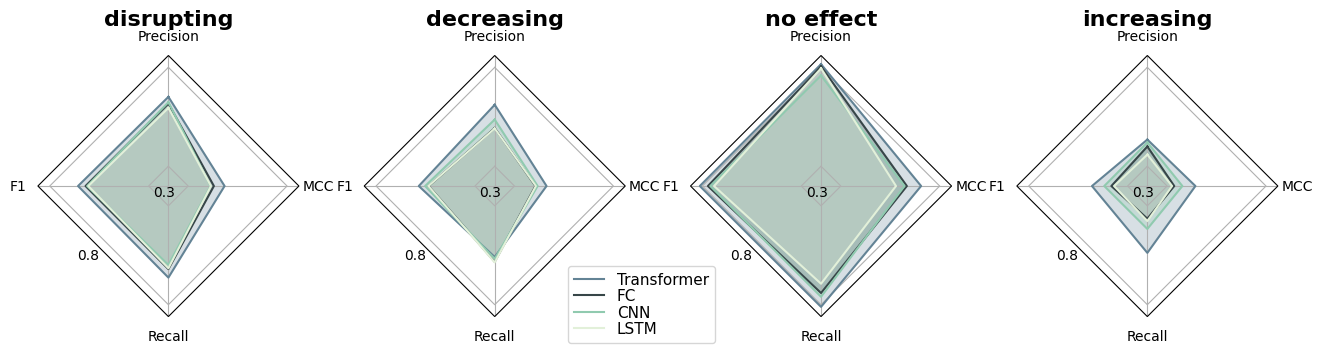

In [11]:
data = [
        ['Precision', 'F1', 'Recall', 'MCC'],
        ('disrupting', [
            [0.651,0.657,0.663,0.484],
            [0.617,0.619,0.62,0.43],
            [0.624,0.611,0.599,0.413],
            [0.595,0.605,0.616,0.415]]),
        ('decreasing', [
            [0.611,0.584,0.559,0.462],
            [0.493,0.534,0.583,0.406],
            [0.536,0.552,0.568,0.417],
            [0.491,0.535,0.586,0.408]]),
        ('no effect', [
            [0.816,0.813,0.811,0.706],
            [0.805,0.772,0.741,0.634],
            [0.759,0.76,0.76,0.622],
            [0.795,0.741,0.694,0.579]]),
        ('increasing', [
            [0.435,0.48,0.538,0.443],
            [0.4,0.382,0.365,0.336],
            [0.42,0.418,0.417,0.377],
            [0.359,0.368,0.377,0.325]])]

N = 4
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)

fig, axs = plt.subplots(figsize=(16, 5), nrows=1, ncols=4,
                            subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['#638395','#374648','#90CAAF','#E2F0D9']
# Plot the four cases from the example data on separate axes
for ax, (title, case_data) in zip(axs.flat, data):
    
    ax.set_title(title, weight='bold', fontsize=16, position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)
    ax.set_rgrids([0.3,0.8],fontsize=10,angle=130.)
    ax.set_rlim(0.2,0.86)

# add legend relative to top-left plot
labels = ('Transformer', 'FC', 'CNN', 'LSTM')
legend = axs[1].legend(labels, loc=(0.78, -.10),
                              labelspacing=0.1, fontsize=11)

#fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',horizontalalignment='center', color='black', weight='bold',size='large')
plt.savefig('abl_transformer.png',dpi=300)
plt.show()

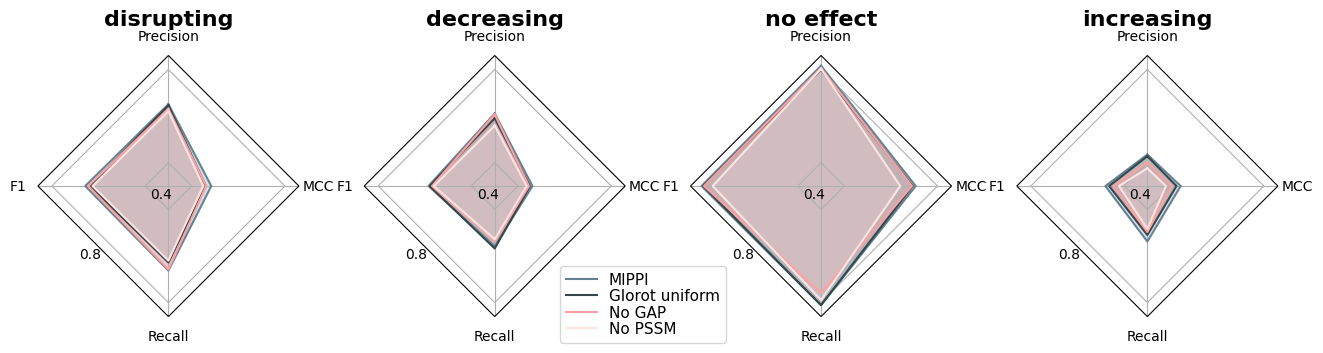

In [12]:
data = [
        ['Precision', 'F1', 'Recall', 'MCC'],
        ('disrupting', [
            [0.651,0.657,0.663,0.484],
            [0.646,0.637,0.628,0.461],
            [0.631,0.644,0.658,0.462],
            [0.621,0.625,0.62,0.449]]),
        ('decreasing', [
            [0.611,0.584,0.559,0.462],
            [0.591,0.579,0.568,0.451],
            [0.607,0.569,0.537,0.447],
            [0.559,0.561,0.528,0.437]]),
        ('no effect', [
            [0.816,0.813,0.811,0.706],
            [0.8,0.805,0.811,0.693],
            [0.806,0.802,0.759,0.69],
            [0.803,0.765,0.789,0.64]]),
        ('increasing', [
            [0.435,0.48,0.538,0.443],
            [0.428,0.464,0.51,0.425],
            [0.402,0.444,0.497,0.404],
            [0.376,0.422,0.484,0.38]])]

N = 4
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)

fig, axs = plt.subplots(figsize=(16, 7), nrows=1, ncols=4,
                            subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['#638395','#374648','#FFA0A0','#FFE3E3']
# Plot the four cases from the example data on separate axes
for ax, (title, case_data) in zip(axs.flat, data):
    
    ax.set_title(title, weight='bold', fontsize=16, position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)
    ax.set_rgrids([0.4,0.8],fontsize=10,angle=130.)
    ax.set_rlim(0.3,0.86)

# add legend relative to top-left plot
labels = ('MIPPI', 'Glorot uniform', 'No GAP', 'No PSSM')
legend = axs[1].legend(labels, loc=(0.75, -.10),
                              labelspacing=0.1, fontsize=11)

#fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',horizontalalignment='center', color='black', weight='bold',size='large')
plt.savefig('abl_gap.png',dpi=300)
plt.show()

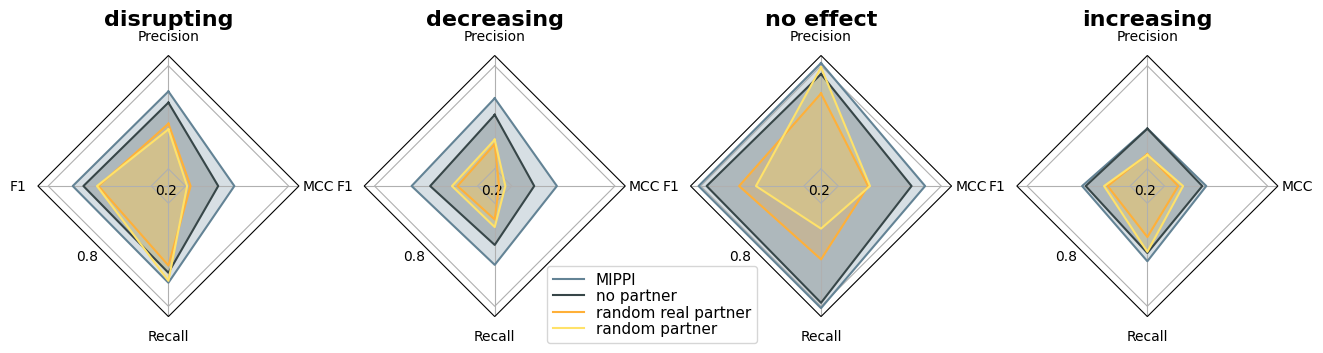

In [13]:
data = [
        ['Precision', 'F1', 'Recall', 'MCC'],
        ('disrupting', [
            [0.651,0.657,0.663,0.484],
            [0.586,0.595,0.605,0.39],
            [0.463,0.507,0.563,0.229],
            [0.43,0.516,0.652,0.209]]),
        ('decreasing', [
            [0.611,0.584,0.559,0.462],
            [0.515,0.476,0.443,0.33],
            [0.344,0.317,0.295,0.125],
            [0.37,0.349,0.339,0.162]]),
        ('no effect', [
            [0.816,0.813,0.811,0.706],
            [0.752,0.766,0.78,0.627],
            [0.639,0.577,0.527,0.374],
            [0.791,0.479,0.348,0.385]]),
        ('increasing', [
            [0.435,0.48,0.538,0.443],
            [0.434,0.459,0.49,0.42],
            [0.286,0.331,0.397,0.28],
            [0.281,0.352,0.483,0.308]])]

N = 4
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)

fig, axs = plt.subplots(figsize=(16, 5), nrows=1, ncols=4,
                            subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['#638395','#374648','#FFB038','#FFE269']
# Plot the four cases from the example data on separate axes
for ax, (title, case_data) in zip(axs.flat, data):
    
    
    ax.set_title(title, weight='bold', fontsize=16,position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
    ax.set_varlabels(spoke_labels)
    ax.set_rgrids([0.2,0.8],fontsize=10,angle=130.)
    ax.set_rlim(0.1,0.86)

# add legend relative to top-left plot
labels = ('MIPPI', 'no partner', 'random real partner', 'random partner')
legend = axs[1].legend(labels, loc=(0.70, -.10),
                              labelspacing=0.1, fontsize=11)

#fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',horizontalalignment='center', color='black', weight='bold',size='large')
plt.savefig('abl_partner.png',dpi=300)
plt.show()